In [22]:
import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2832\838986374.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [23]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root = "cifar10", download = True)

cdata

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train

In [24]:
print(cdata.data.shape)

print(cdata.classes)

print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


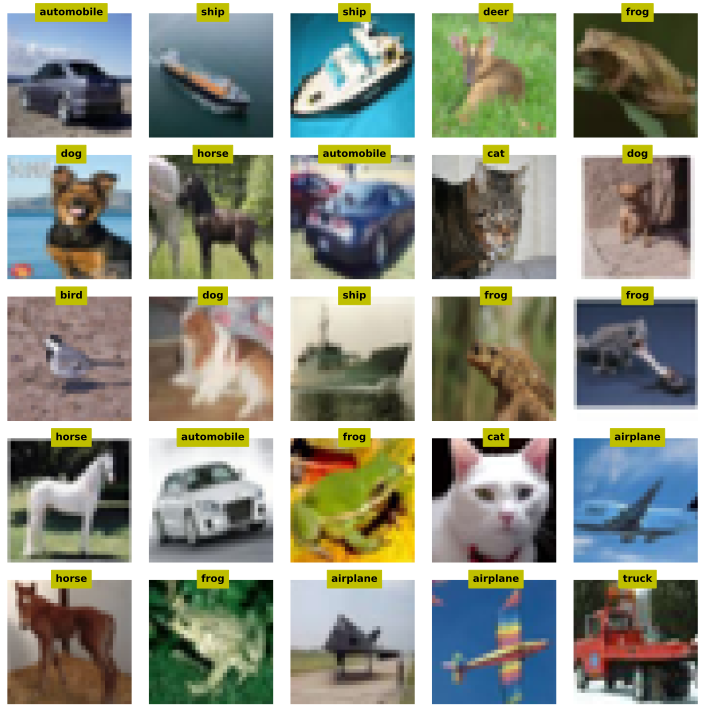

In [25]:
fig, axs = plt.subplots(5, 5, figsize = (10, 10))

for ax in axs.flatten():

    # select a random picture
    randidx = np.random.choice(len(cdata.targets))

    # extract that image
    pic = cdata.data[randidx, :, :, :]
    # and it's label
    label = cdata.classes[cdata.targets[randidx]]

    ax.imshow(pic)
    ax.text(16, 0, label, ha = "center", fontweight = "bold", color = "k", backgroundcolor = "y")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [26]:
Ts = T.Compose([
    T.ToTensor(), # converts image or numpy array to tensor
    # it also converts integer range of image from [0, 255] to [0.0, 1.0], normalizes data
    T.Resize(32*4), # increase the resolution of image by a factor of 4
    T.Grayscale(num_output_channels = 1)
])

# include the transformation in the dataset
cdata.transform = Ts

# Note: adding a transformation doesn't change the image data
print(cdata.data[123, :, :, :].shape)

(32, 32, 3)


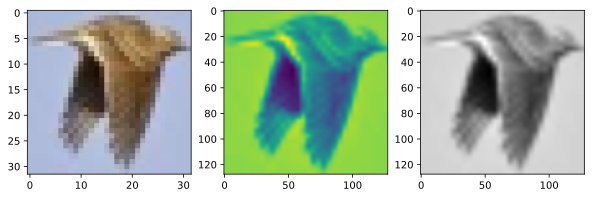

In [27]:
# apply the transform

# option 1a: apply the transform "externally" to an image
img1 = Ts(cdata.data[123, :, :, :])

# option 1b: use the embedded transform
img2 = cdata.transform(cdata.data[123, :, :, :])

fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [28]:
# transformed image is of 32x4 = 128, therefore 128x128 pixels (upscaled)

In [29]:
# Note about ToTensor() and normalization:
??T.ToTensor() # converts image or numpy array to tensor
# it also converts integer range of image from [0, 255] to [0.0, 1.0], normalizes data

Object `T.ToTensor() # converts image or numpy array to tensor` not found.
